In [1]:
from matplotlib.pyplot import show as show_static
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import sys
import glob
from scipy import stats

sys.path.append('../../')
from utils import dataframe_utils, clustering_utils

In [2]:
microarray_data_pattern = './tgd2024_may15_avg_scan_stats_microarray/*.csv'

rna_seq_data_pattern = './tgd2024_may15_avg_scan_stats_rna_seq/*.csv'

microarray_stats_files = glob.glob(microarray_data_pattern) + glob.glob('./tgd2024_may15_avg_scan_stats_microarray/nc/*.csv')

rna_seq_stats_files = glob.glob(rna_seq_data_pattern) + glob.glob('./tgd2024_may15_avg_scan_stats_rna_seq/nc/*.csv')

microarray_stats_df = dataframe_utils.csv_files_to_df(microarray_stats_files)

rna_seq_stats_df = dataframe_utils.csv_files_to_df(rna_seq_stats_files)

In [3]:
microarray_stats_df['fraction_clusters_enriched'] = microarray_stats_df.apply(clustering_utils.compute_fraction_clusters_enriched, axis=1)

In [4]:
rna_seq_stats_df['fraction_clusters_enriched'] = rna_seq_stats_df.apply(clustering_utils.compute_fraction_clusters_enriched, axis=1)

In [5]:
df_stats = microarray_stats_df
# df_stats = rna_seq_stats_df

In [6]:
df_stats

,partition_type,dimensionality,metric,graph,nns,clustering,parameter,silhouette_score,modularity,nclusters,...,max_enriched_cluster_size,min_enriched_cluster_size,nenriched_cluster_genes,datetime,max_fraction_same_cluster_MCMsubset.tsv,max_fraction_same_cluster_ProteosomeSubset.tsv,max_fraction_same_cluster_Histone_subset.tsv,max_fraction_same_cluster_MucocystSubsets.tsv,max_fraction_same_cluster_RibosomalSubset.tsv,fraction_clusters_enriched
0,EXP,baseline,manhattan,umap_fuzzy_simplicial_set,11,leiden_cpm,0.000,NaN,0.000000,1,...,20426,20426,20426,2024-05-20 11:36:20.510456,1.000000,1.0,1.0,1.0,1.000000,1.000000
1,EXP,baseline,manhattan,umap_fuzzy_simplicial_set,11,leiden_cpm,0.005,0.032619,0.560810,173,...,344,25,14288,2024-05-20 11:36:20.510456,0.333333,0.5,1.0,1.0,0.428571,0.618497
2,EXP,baseline,manhattan,umap_fuzzy_simplicial_set,11,leiden_cpm,0.010,0.028410,0.499882,330,...,162,8,11457,2024-05-20 11:36:20.510456,0.333333,0.5,1.0,1.0,0.428571,0.503030
3,EXP,baseline,manhattan,umap_fuzzy_simplicial_set,11,leiden_cpm,0.015,0.026659,0.462227,474,...,110,12,9266,2024-05-20 11:36:20.510456,0.333333,0.5,1.0,1.0,0.428571,0.402954
4,EXP,baseline,manhattan,umap_fuzzy_simplicial_set,11,leiden_cpm,0.020,0.026406,0.441483,609,...,98,8,8601,2024-05-20 11:36:20.510456,0.333333,0.5,1.0,1.0,0.428571,0.356322
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2426,NC,baseline,manhattan,umap_fuzzy_simplicial_set,3,leiden_cpm,0.005,-0.056259,0.649941,775,...,51,18,975,2024-05-31 15:04:44.154417,0.333333,0.5,1.0,1.0,0.142857,0.043871
2427,NC,baseline,manhattan,umap_fuzzy_simplicial_set,3,leiden_cpm,0.005,-0.053995,0.651992,780,...,43,14,936,2024-05-31 15:04:44.154417,0.333333,0.5,1.0,1.0,0.142857,0.046154
2428,NC,baseline,manhattan,umap_fuzzy_simplicial_set,3,leiden_cpm,0.005,-0.056395,0.650248,780,...,45,13,899,2024-05-31 15:04:44.154417,0.333333,0.5,1.0,1.0,0.142857,0.043590
2429,NC,baseline,manhattan,umap_fuzzy_simplicial_set,3,leiden_cpm,0.005,-0.058931,0.652060,770,...,44,16,741,2024-05-31 15:04:44.154417,0.333333,0.5,1.0,1.0,0.142857,0.033766


In [7]:
df_stats_exp = df_stats.loc[
    (df_stats['partition_type'] == 'EXP')
    &
    (df_stats['metric'] == 'manhattan')
    &
    (df_stats['nns'] == 3)
    &
    (df_stats['parameter'] == 0.005)
                            ]
df_stats_nc = df_stats.loc[df_stats['partition_type'] == 'NC']
df_stats_tnc = df_stats.loc[df_stats['partition_type'] == 'TNC']

In [8]:
# hist_clustering_metric = 'silhouette_score'
hist_clustering_metric = 'modularity'

hist_data = df_stats_nc[hist_clustering_metric].values
hist_data

array([0.65042991, 0.65147536, 0.65110509, 0.65383978, 0.65337456,
       0.64970631, 0.64994095, 0.65199222, 0.65024754, 0.65206049])

In [9]:
exp_line_at_x = df_stats_exp[hist_clustering_metric].values[0]
exp_line_at_x

0.7613576184850636

In [10]:
tnc_line_at_x = df_stats_tnc[hist_clustering_metric].values[0]
tnc_line_at_x

0.6846649659318523

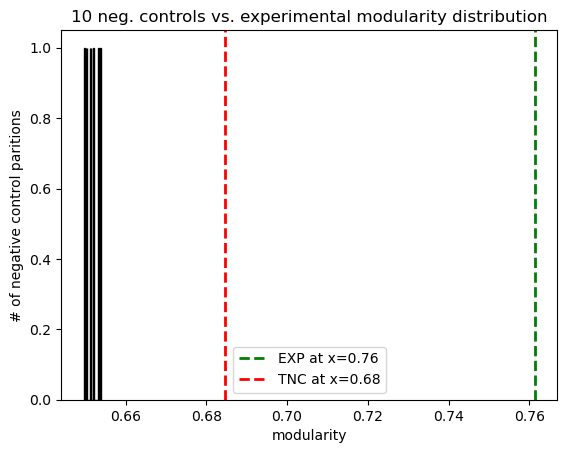

In [11]:
# Create the histogram
plt.hist(hist_data, bins=30, edgecolor='black')

# Add a vertical line at the specified x value
plt.axvline(x=exp_line_at_x, color='green', linestyle='dashed', linewidth=2, label='EXP at x={}'.format(round(exp_line_at_x, 2)))
plt.axvline(x=tnc_line_at_x, color='red', linestyle='dashed', linewidth=2, label='TNC at x={}'.format(round(tnc_line_at_x, 2)))


# Add labels and title
plt.xlabel(hist_clustering_metric)
plt.ylabel('# of negative control paritions')
plt.title(f'{len(hist_data)} neg. controls vs. experimental {hist_clustering_metric} distribution')

plt.legend()

# Show the plot
plt.show()

In [12]:
df_stats_nc['silhouette_score'].mean()

-0.05685359746258498

In [13]:
df_stats_nc['silhouette_score'].median()

-0.05663612882341015

In [14]:
df_stats_nc['silhouette_score'].max()

-0.0528749825641353

In [15]:
df_stats_nc['modularity'].mean()

0.6514172211001327

In [16]:
df_stats_nc['modularity'].median()

0.6512902237633005

In [17]:
df_stats_nc['modularity'].max()

0.6538397836472338

In [18]:
nc_mean = df_stats_nc[hist_clustering_metric].mean()
nc_std = df_stats_nc[hist_clustering_metric].std()

nc_se = nc_std / (np.sqrt(len(hist_data)))

nc_mean, nc_std, nc_se

(0.6514172211001327, 0.001414006325940068, 0.0004471480615857045)

In [19]:
t_stat = (exp_line_at_x - nc_mean) / nc_se

d_freedom = len(hist_data) - 1

t_stat, d_freedom

(245.87023142860858, 9)

In [20]:
p_value = 2 * (1 - stats.t.cdf(abs(t_stat), d_freedom))
p_value

0.0

In [21]:
alpha = 0.05
alpha

0.05

In [22]:
p_value < alpha

True